### Double Integration

This is analogous to integrating a function of one variable. Integrating a function of one variable would find the area under the curve within some bounds of x. Integrating a function of two variables will find the volume under a surface within some bounds of $ x,y $.

You could imagine a region of integration on the x-y plane projeted onto a surface. Integrating finds the volume under the surface and above the plane.

$ z(x,y) = 10 - (x^2 + y^2) $


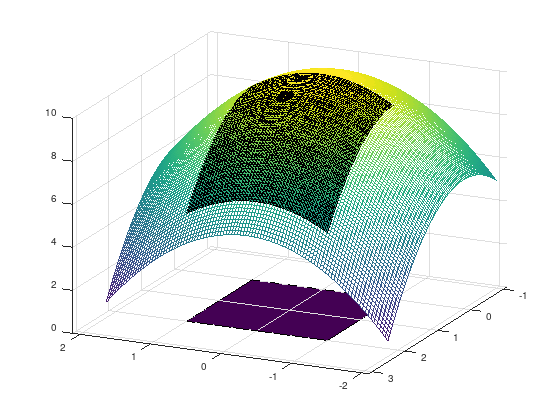

In [40]:
# This is the surface
surfX = linspace( -2, 2 );
surfY = linspace( -1, 2.3 );
surfZ = 10 - (surfX.^2 + transpose(surfY.^2));

mesh(surfX,surfY,surfZ);
hold on;
axis([-2.1 2.1 -1.1 3.1 0 10]);

[planeX planeY] = meshgrid([-1 1], [0 2]);
planeZ = zeros(2,2);

surf(planeX, planeY, planeZ);

# This is the projection
projectionX = linspace( -1, 1 );
projectionY = linspace( 0, 2 );
projectionZ = 10 - (projectionX.^2 + transpose(projectionY.^2));

surf(projectionX,projectionY,projectionZ);

view(-155, 24);


Double integration for a surface, or a function of two variables, will find the volume under the surface within the limits of integration. This means we're finding a definite integral in two dimensions.

It is done by integrating with respect to one variable and then the other.

#### Example 1

Consider the function plotted above

$ \int_{-1}^1 \left( \int_0^2 (10 - (x^2 + y^2)) dx \right) dy $

But in this case it wouldn't matter if we instead did it this way:

$ \int_{0}^2 \left( \int_{-1}^1 (10 - (x^2 + y^2)) dy \right) dx $

But sometimes the limits are written in terms of one or more of the variables and you need to do some work.

Let's focus on: $ \int_{-1}^1 \left( \int_0^2 (10 - (x^2 + y^2)) dx \right) dy $

This just involves keeping $ y $ constant.

$ \int_0^2 (10 - x^2 + y^2) dx $

$ = \left[ 10x - (\frac{x^3}{3} + xy^2) + C \right]_0^2 $

$ = \left[ 10(2) - (\frac{(2)^3}{3} + (2)y^2) + C \right] - \left[ 10(0) - (\frac{(0)^3}{3} + (0)y^2) + C \right] $

$ = \left[ 20 - (\frac{8}{3}+ 2y^2) \right] $

$ = \frac{52}{3} - 2y^2 $

And then the outer integral:

$ \int_{-1}^1 \left( \frac{52}{3} - 2y^2 \right) dy $ 

$ = \left[ \frac{52}{3}y - \frac{2y^3}{3} + C \right]_{-1}^1 $  

$ = \left[ \frac{52}{3}(1) - \frac{2(1)^3}{3} + C \right] - \left[ \frac{52}{3}(-1) - \frac{2(-1)^3}{3} + C \right] $

$ = \left[ \frac{52}{3} - \frac{2}{3} \right] - \left[ \frac{-52}{3} - \frac{-2}{3} \right] $

$ = \left[ \frac{50}{3} \right] - \left[ \frac{-50}{3} \right] $

$ = \frac{100}{3} \approx 33.33 $

### Changing the order of integration

Consider this example from https://www.youtube.com/watch?v=LUvynduoUX0

$ \int_{0}^8 \left( \int_{\sqrt[3]{x}}^2 \left(\frac{1}{y^4 + 1}\right) dy \right) dx $

Integrating the inner part with respect to $ y $ is unknown.

First let's look at what the limits are telling us, with this shape on the x-y plane. The area to integrate is in the red outline shape. This would be projected onto the surface for integrating but we are just interested in the limits themselves here.

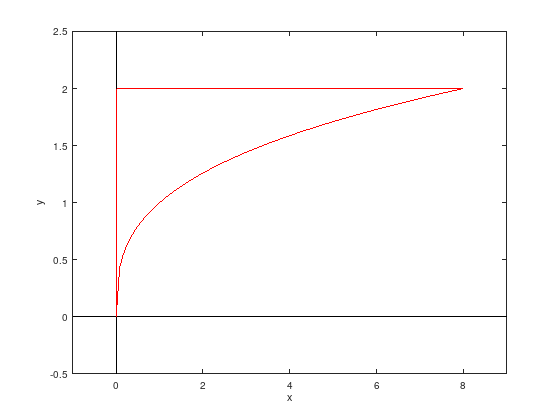

In [99]:
function drawRegionToIntegrate()
    X = linspace(0, 8);
    Y = cbrt(X); # Draws the bottom y-limit;

    plot(X, Y, "Color", "Red");
    hold on;
    line([0 8], [2 2], "color", "red");
    line([0 0], [-1 3], "color", "black");
    line([-1 9], [0 0], "color", "black");
    line([0 0], [0 2], "color", "red");

    xlim([-1 9]);
    ylim([-0.5 2.5]);

    xlabel("x");
    ylabel("y");
end

drawRegionToIntegrate();

For the inner integral, $x$ is held constant, then you can imagine a line at some value of $x=C$. Read the limits as the line passes through those points in an upwards direction.

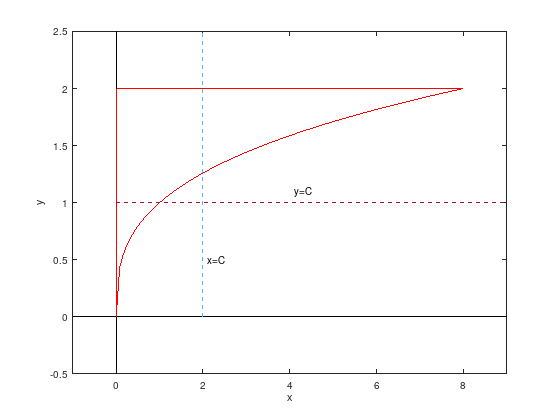

In [109]:
drawRegionToIntegrate();
line([2 2], [0 2.5], "linestyle", "--");
text(2.1, 0.5, "x=C")
line([0 9], [1 1], "linestyle", "--");
text(4.1, 1.1, "y=C")

If you wanted to evaluate the integral with respect to $ x $ first then you would need to change the inner integral's limits to between 0 and $\sqrt[3]{x}$

But we also need that upper limit function to be in terms of $ y $ so that we can integrate in terms of $ x $.

$y = \sqrt[3]{x}$

$y^3 = x $, and this is the new limit. Holding $ y $ constant we can see the limits are: $0, y^3 $

The new integral becomes:

$ \int_{0}^2 \left( \int_{0}^{y^3} \left(\frac{1}{y^4 + 1}\right) dx \right) dy $